# Using birdnet_analyze_v1.parquet

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_parquet(
    "https://storage.googleapis.com/birdclef-eda-f22/data/processed/birdnet/birdnet_analyze_v1.parquet"
)
df.head()

,start_sec,end_sec,confidence,birdnet_label,filename
0,0.0,3.0,0.9030,afrsil1,afrsil1/XC125458.ogg
1,0.0,3.0,0.4720,indsil,afrsil1/XC125458.ogg
2,3.0,6.0,0.7311,afrsil1,afrsil1/XC125458.ogg
3,6.0,9.0,0.5888,afrsil1,afrsil1/XC125458.ogg
0,0.0,3.0,0.7585,whsflu1,afrsil1/XC175522.ogg


## plotting confidences

In [2]:
random_row = df.sample(1, random_state=20221030 + 1).iloc[0]
subset = df[df.filename == random_row.filename]
subset

,start_sec,end_sec,confidence,birdnet_label,filename
0,0.0,3.0,0.5494,tawpip1,skylar/XC534505.ogg
1,0.0,3.0,0.2302,skylar,skylar/XC534505.ogg
2,6.0,9.0,0.7055,skylar,skylar/XC534505.ogg
3,6.0,9.0,0.3418,tawpip1,skylar/XC534505.ogg
4,9.0,12.0,0.8009,tawpip1,skylar/XC534505.ogg
5,9.0,12.0,0.1583,ricpip1,skylar/XC534505.ogg
6,9.0,12.0,0.1085,lstlar2,skylar/XC534505.ogg
7,12.0,15.0,0.1058,lstlar2,skylar/XC534505.ogg
8,15.0,18.0,0.1798,uraowl1,skylar/XC534505.ogg
9,18.0,21.0,0.8528,tawpip1,skylar/XC534505.ogg


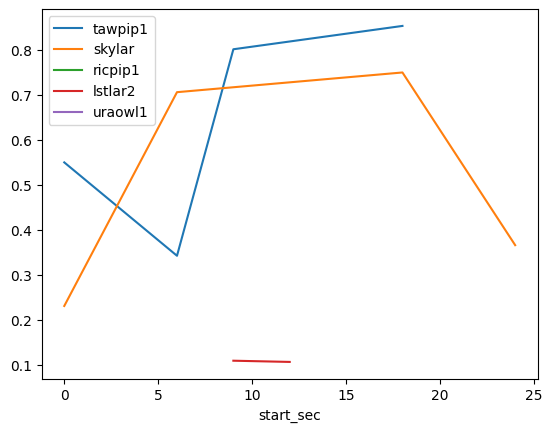

In [3]:
for label in subset.birdnet_label.unique():
    sub = subset[subset.birdnet_label == label]
    if sub.size < 2:
        continue
    sub.plot(x="start_sec", y="confidence", label=label, ax=plt.gca())
plt.show()

### Getting the common name

In [4]:
taxonomy_df = pd.read_csv(
    "https://storage.googleapis.com/birdclef-eda-f22/data/raw/birdclef-2022/eBird_Taxonomy_v2021.csv"
)
taxonomy_df.columns = taxonomy_df.columns.str.lower()
taxonomy_df.head()

,taxon_order,category,species_code,primary_com_name,sci_name,order1,family,species_group,report_as
0,1,species,ostric2,Common Ostrich,Struthio camelus,Struthioniformes,Struthionidae (Ostriches),Ostriches,NaN
1,6,species,ostric3,Somali Ostrich,Struthio molybdophanes,Struthioniformes,Struthionidae (Ostriches),NaN,NaN
2,7,slash,y00934,Common/Somali Ostrich,Struthio camelus/molybdophanes,Struthioniformes,Struthionidae (Ostriches),NaN,NaN
3,8,species,grerhe1,Greater Rhea,Rhea americana,Rheiformes,Rheidae (Rheas),Rheas,NaN
4,14,species,lesrhe2,Lesser Rhea,Rhea pennata,Rheiformes,Rheidae (Rheas),NaN,NaN


In [5]:
pd.merge(
    subset,
    taxonomy_df[["species_code", "primary_com_name"]].rename(
        columns={"species_code": "birdnet_label"}
    ),
    on="birdnet_label",
).rename(columns={"primary_com_name": "birdnet_common_name"})

,start_sec,end_sec,confidence,birdnet_label,filename,birdnet_common_name
0,0.0,3.0,0.5494,tawpip1,skylar/XC534505.ogg,Tawny Pipit
1,6.0,9.0,0.3418,tawpip1,skylar/XC534505.ogg,Tawny Pipit
2,9.0,12.0,0.8009,tawpip1,skylar/XC534505.ogg,Tawny Pipit
3,18.0,21.0,0.8528,tawpip1,skylar/XC534505.ogg,Tawny Pipit
4,0.0,3.0,0.2302,skylar,skylar/XC534505.ogg,Eurasian Skylark
5,6.0,9.0,0.7055,skylar,skylar/XC534505.ogg,Eurasian Skylark
6,18.0,21.0,0.7493,skylar,skylar/XC534505.ogg,Eurasian Skylark
7,24.0,27.0,0.3654,skylar,skylar/XC534505.ogg,Eurasian Skylark
8,9.0,12.0,0.1583,ricpip1,skylar/XC534505.ogg,Richard's Pipit
9,9.0,12.0,0.1085,lstlar2,skylar/XC534505.ogg,Asian Short-toed Lark


## Joining against training metadata

In [6]:
train_metadata_df = pd.read_csv(
    "https://storage.googleapis.com/birdclef-eda-f22/data/raw/birdclef-2022/train_metadata.csv"
)
train_metadata_df.head()

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,time,url,filename
0,afrsil1,[],"['call', 'flight call']",12.3910,-1.4930,Euodice cantans,African Silverbill,Bram Piot,Creative Commons Attribution-NonCommercial-Sha...,2.5,08:00,https://www.xeno-canto.org/125458,afrsil1/XC125458.ogg
1,afrsil1,"['houspa', 'redava', 'zebdov']",['call'],19.8801,-155.7254,Euodice cantans,African Silverbill,Dan Lane,Creative Commons Attribution-NonCommercial-Sha...,3.5,08:30,https://www.xeno-canto.org/175522,afrsil1/XC175522.ogg
2,afrsil1,[],"['call', 'song']",16.2901,-16.0321,Euodice cantans,African Silverbill,Bram Piot,Creative Commons Attribution-NonCommercial-Sha...,4.0,11:30,https://www.xeno-canto.org/177993,afrsil1/XC177993.ogg
3,afrsil1,[],"['alarm call', 'call']",17.0922,54.2958,Euodice cantans,African Silverbill,Oscar Campbell,Creative Commons Attribution-NonCommercial-Sha...,4.0,11:00,https://www.xeno-canto.org/205893,afrsil1/XC205893.ogg
4,afrsil1,[],['flight call'],21.4581,-157.7252,Euodice cantans,African Silverbill,Ross Gallardy,Creative Commons Attribution-NonCommercial-Sha...,3.0,16:30,https://www.xeno-canto.org/207431,afrsil1/XC207431.ogg


In [7]:
pd.merge(
    subset,
    train_metadata_df[["filename", "primary_label", "secondary_labels", "type"]],
    on="filename",
)

,start_sec,end_sec,confidence,birdnet_label,filename,primary_label,secondary_labels,type
0,0.0,3.0,0.5494,tawpip1,skylar/XC534505.ogg,skylar,[],['nocturnal flight call']
1,0.0,3.0,0.2302,skylar,skylar/XC534505.ogg,skylar,[],['nocturnal flight call']
2,6.0,9.0,0.7055,skylar,skylar/XC534505.ogg,skylar,[],['nocturnal flight call']
3,6.0,9.0,0.3418,tawpip1,skylar/XC534505.ogg,skylar,[],['nocturnal flight call']
4,9.0,12.0,0.8009,tawpip1,skylar/XC534505.ogg,skylar,[],['nocturnal flight call']
5,9.0,12.0,0.1583,ricpip1,skylar/XC534505.ogg,skylar,[],['nocturnal flight call']
6,9.0,12.0,0.1085,lstlar2,skylar/XC534505.ogg,skylar,[],['nocturnal flight call']
7,12.0,15.0,0.1058,lstlar2,skylar/XC534505.ogg,skylar,[],['nocturnal flight call']
8,15.0,18.0,0.1798,uraowl1,skylar/XC534505.ogg,skylar,[],['nocturnal flight call']
9,18.0,21.0,0.8528,tawpip1,skylar/XC534505.ogg,skylar,[],['nocturnal flight call']
